🌱 Crop Recommendation System using Machine Learning

         🎯 Objective

Recommend the most suitable crop based on:

Nitrogen (N)

Phosphorus (P)

Potassium (K)

Temperature

Humidity

Soil pH

Rainfall

This is a multi-class classification problem.

2️⃣ Machine Learning Problem Type

Aspect	            Description
Problem Type    	Supervised Learning
Task	            Classification
Output	            Crop Name (Rice, Wheat, Maize, etc.)
Classes	Multiple    (≈22 crops)

📊 Features
Feature 	Meaning
N	        Nitrogen content in soil
P	        Phosphorus content
K	        Potassium content
temperature	Avg temperature (°C)
humidity	Relative humidity (%)
ph	        Soil pH value
rainfall	Rainfall (mm)

🎯Target Variable
  label → Crop name

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

📌 Why these libraries?

NumPy → numerical operations

Pandas → dataset handling

Matplotlib/Seaborn → visualization

Scikit-learn → ML algorithms

In [2]:
#Load the dataset
df = pd.read_csv('crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#basic checks
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
#EDA
#Check the missing values

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

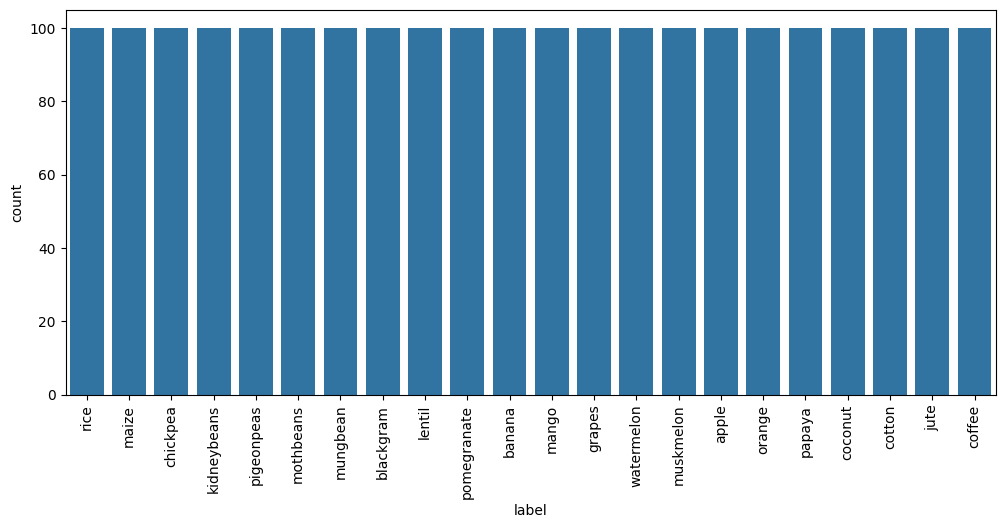

In [5]:
#📈 Crop Distribution
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=df)
plt.xticks(rotation=90)
plt.show()

#Why this matters?
#Ensures dataset balance
#Prevents biased models

In [6]:
#8️⃣ Feature & Target Separation
X = df.drop('label', axis=1)
y = df['label']

In [7]:
#9️⃣ Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

In [8]:
#🔟 Feature Scaling (Mathematics)
#❓ Why Scaling?
#Some models use distance or gradients.
#📐 Formula (Standardization)
#z=x-miu/sigma

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Machine Learning Models
#🔹Logistic Regression (Multiclass)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
accuracy_score(y_test, pred_lr)



0.9636363636363636

In [10]:
#🔹 K-Nearest Neighbors (KNN)
#Concept:
#Distance-based
#Majority voting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
accuracy_score(y_test, pred_knn)

0.9568181818181818

In [11]:
#🔹 Decision Tree
#Concept:
#Rule-based learning
#Uses entropy or Gini index
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
accuracy_score(y_test, pred_dt)

0.9863636363636363

In [12]:
#🔹 Random Forest
#Why powerful?
#Ensemble learning
#Reduces overfitting
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)

0.9931818181818182

In [13]:
#🔹 Support Vector Machine (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
accuracy_score(y_test, pred_svm)

0.9681818181818181

In [14]:
#Model Comparison
models = {
'Logistic Regression': accuracy_score(y_test, pred_lr),
'KNN': accuracy_score(y_test, pred_knn),
'Decision Tree': accuracy_score(y_test, pred_dt),
'Random Forest': accuracy_score(y_test, pred_rf),
'SVM': accuracy_score(y_test, pred_svm)
}


pd.DataFrame(models.items(), columns=['Model', 'Accuracy'])

,Model,Accuracy
0,Logistic Regression,0.963636
1,KNN,0.956818
2,Decision Tree,0.986364
3,Random Forest,0.993182
4,SVM,0.968182


      Best Model Selection
✅ Why Random Forest?

Highest accuracy

Handles non-linearity

Robust to noise

Works well with tabular data

In [15]:
#Confusion Matrix & Report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [17]:
#Save Trained Model & Scaler
import pickle


pickle.dump(rf, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
!streamlit run app.py